In [1]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

# Import churn data csv [In-text citation: Middleton, K. (n.d.). Dr. Middleton PA Step-by-Step Guide (NBM3).]
df = pd.read_csv('churn_clean.csv', keep_default_na=False)

# Check the database info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
# Inspecting my dataframe
pd.set_option("display.max_columns", None)
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


## C1: Data Cleaning

In [3]:
#Checking for missing values in the dataset
df_null = df.isnull().sum()
df_null

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [4]:
# dropping columns that likely have no direct relevance to my analysis
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Children', 'Area', 'Marital', 'Email', 'TechSupport', 'Job', 'Yearly_equip_failure', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [5]:
#Fixing the columns with names that fit python casing rules
updated_names = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id', 
    'Interaction': 'interaction', 
    'UID': 'uid', 
    'City': 'city', 
    'State': 'state', 
    'County': 'county', 
    'Zip': 'zip_code', 
    'Lat': 'latitude', 
    'Lng': 'longitude', 
    'Population': 'population', 
    'TimeZone': 'timezone', 
    'Children': 'children',
    'Area': 'area_type',
    'Job': 'job_title',
    'Age': 'age',
    'Income': 'income',
    'Marital': 'marital_status',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'tech_support_contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone_service',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'srv1_timely_response',
    'Item2': 'srv2_timely_fixes',
    'Item3': 'srv3_timely_replacements',
    'Item4': 'srv4_reliability',
    'Item5': 'srv5_options',
    'Item6': 'srv6_respectful_response',
    'Item7': 'srv7_courteous_exchange',
    'Item8': 'srv8_staff_listening'}
df.rename(columns=updated_names, inplace=True)

In [6]:
#Checking Stats for possible outliers of included columns
with pd.option_context('display.max_columns', 40):
    print(df.describe(include = [np.number]))
    pd.reset_option('display.max_columns')

                age         income  outage_sec_perweek  tech_support_contacts  \
count  10000.000000   10000.000000        10000.000000           10000.000000   
mean      53.078400   39806.926771           10.001848               0.994200   
std       20.698882   28199.916702            2.976019               0.988466   
min       18.000000     348.670000            0.099747               0.000000   
25%       35.000000   19224.717500            8.018214               0.000000   
50%       53.000000   33170.605000           10.018560               1.000000   
75%       71.000000   53246.170000           11.969485               2.000000   
max       89.000000  258900.700000           21.207230               7.000000   

             tenure  monthly_charge  bandwidth_gb_year  
count  10000.000000    10000.000000       10000.000000  
mean      34.526188      172.624816        3392.341550  
std       26.443063       42.943094        2185.294852  
min        1.000259       79.978860       

In [7]:
#Checking the lowest values in the income column to check for extremeties
df.income.nsmallest(n=15)

4502     348.67
272      368.50
2051     630.24
6732     643.20
6190     644.32
1896     740.66
2525     901.21
4169     938.81
5461     945.47
4733     951.96
5714     954.43
9313    1050.46
4627    1055.12
3649    1062.32
3534    1109.71
Name: income, dtype: float64

In [8]:
#Checking the highest values in the income column to check for extremeties
df.income.nlargest(n=15)

4249    258900.70
9180    256998.40
6649    231252.00
5599    220383.00
5801    212255.30
6594    196746.00
6837    194550.70
3985    189938.40
8830    186156.60
972     186035.04
2762    175137.30
9249    173978.00
656     172884.11
3782    172372.20
685     169580.73
Name: income, dtype: float64

## C2: Summary Statistics

In [9]:
#Grouping all of my numeric columns for independent variables
ind_num = df.select_dtypes(exclude = ['object']).drop(columns=['bandwidth_gb_year'])
ind_num

,age,income,outage_sec_perweek,tech_support_contacts,tenure,monthly_charge
0,68,28561.99,7.978323,0,6.795513,172.455519
1,27,21704.77,11.699080,0,1.156681,242.632554
2,50,9609.57,10.752800,0,15.754144,159.947583
3,48,18925.23,14.913540,2,17.087227,119.956840
4,83,40074.19,8.147417,2,1.670972,149.948316
...,...,...,...,...,...,...
9995,23,55723.74,9.415935,2,68.197130,159.979400
9996,48,34129.34,6.740547,2,61.040370,207.481100
9997,48,45983.43,6.590911,0,47.416890,169.974100
9998,39,16667.58,12.071910,1,71.095600,252.624000


In [10]:
#Grouping all of my categorical columns for independent variables
ind_cat = df.select_dtypes(exclude = ['float64', 'int64'])
ind_cat

,gender,churn,techie,contract,port_modem,tablet,internet_service,phone_service,multiple_lines,online_security,online_backup,device_protection,streaming_tv,streaming_movies
0,Male,No,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,Yes
1,Female,Yes,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes
2,Female,No,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,Male,No,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,Yes,No
4,Male,Yes,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,No,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No
9996,Male,No,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,No
9997,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No
9998,Male,No,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes


In [11]:
#Viewing the summary stats for the dependent variable
df['bandwidth_gb_year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: bandwidth_gb_year, dtype: float64

In [12]:
#Reviewing the summary stats for numeric independent variables
print(ind_num.describe())

                age         income  outage_sec_perweek  tech_support_contacts  \
count  10000.000000   10000.000000        10000.000000           10000.000000   
mean      53.078400   39806.926771           10.001848               0.994200   
std       20.698882   28199.916702            2.976019               0.988466   
min       18.000000     348.670000            0.099747               0.000000   
25%       35.000000   19224.717500            8.018214               0.000000   
50%       53.000000   33170.605000           10.018560               1.000000   
75%       71.000000   53246.170000           11.969485               2.000000   
max       89.000000  258900.700000           21.207230               7.000000   

             tenure  monthly_charge  
count  10000.000000    10000.000000  
mean      34.526188      172.624816  
std       26.443063       42.943094  
min        1.000259       79.978860  
25%        7.917694      139.979239  
50%       35.430507      167.484700  
75% 

In [13]:
#Viewing the summary stats for categorical independent variables
vc_list = []
for col in ind_cat.columns:
    counts = ind_cat[col].value_counts().to_dict()
    vc_list.append({col: counts})

vc_list

[{'gender': {'Female': 5025, 'Male': 4744, 'Nonbinary': 231}},
 {'churn': {'No': 7350, 'Yes': 2650}},
 {'techie': {'No': 8321, 'Yes': 1679}},
 {'contract': {'Month-to-month': 5456, 'Two Year': 2442, 'One year': 2102}},
 {'port_modem': {'No': 5166, 'Yes': 4834}},
 {'tablet': {'No': 7009, 'Yes': 2991}},
 {'internet_service': {'Fiber Optic': 4408, 'DSL': 3463, 'None': 2129}},
 {'phone_service': {'Yes': 9067, 'No': 933}},
 {'multiple_lines': {'No': 5392, 'Yes': 4608}},
 {'online_security': {'No': 6424, 'Yes': 3576}},
 {'online_backup': {'No': 5494, 'Yes': 4506}},
 {'device_protection': {'No': 5614, 'Yes': 4386}},
 {'streaming_tv': {'No': 5071, 'Yes': 4929}},
 {'streaming_movies': {'No': 5110, 'Yes': 4890}}]

## C3: Univariate & Bivariate Statistics

### Univarite Visualizations

<Axes: xlabel='bandwidth_gb_year', ylabel='Count'>

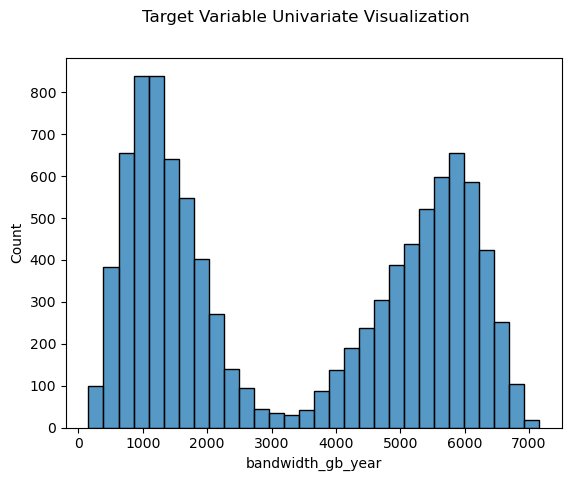

In [14]:
#ignoring FutureWarnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#Creating a histogram visualization for my dependent (target) variable
plt.suptitle('Target Variable Univariate Visualization')
sns.histplot(data=df, x='bandwidth_gb_year', bins=30)

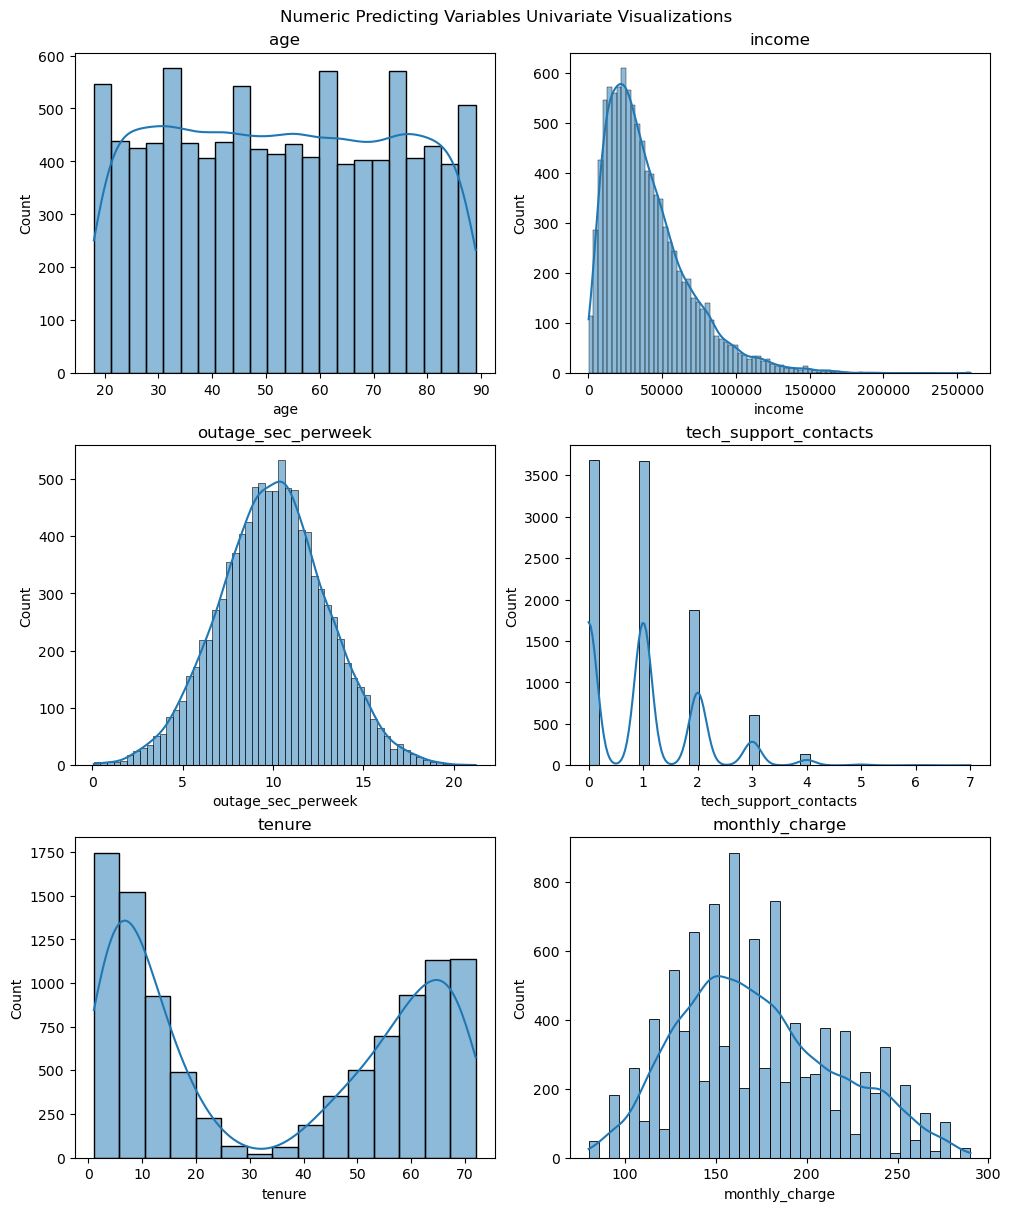

In [15]:
#Creating histogram visualizations for my numeric independent (predicting) variables
fig, axes = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(10, 12), constrained_layout=True)

for col, ax in zip(ind_num.columns, axes.flat):
    plt.suptitle('Numeric Predicting Variables Univariate Visualizations')
    sns.histplot(ind_num[col], ax=ax, kde=True)
    ax.set_title(col)

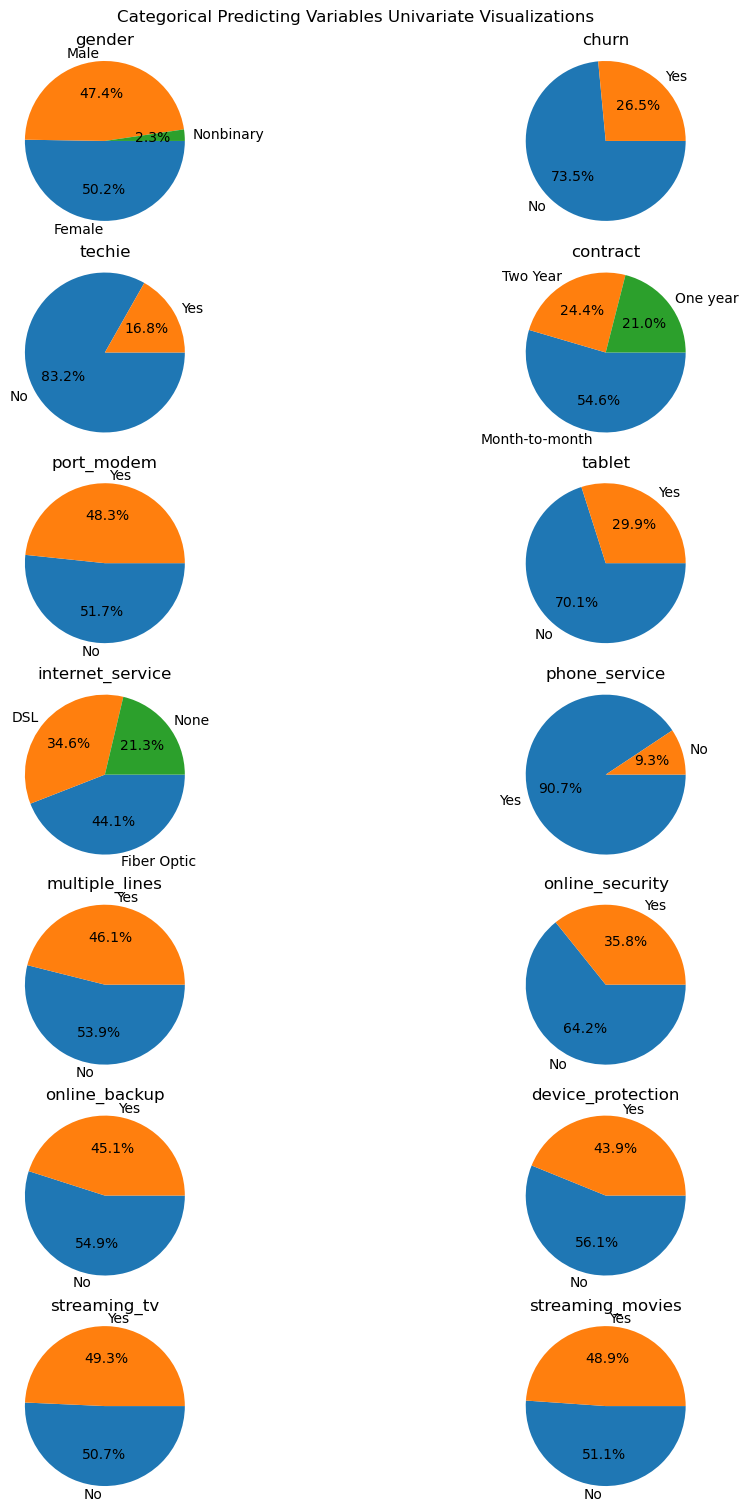

In [16]:
#Creating pie chart visualizations for my categorical independent (predicting) variables
fig, axes = plt.subplots(7, 2, sharex=False, sharey=False, figsize=(10, 15), constrained_layout=True)

for col, ax in zip(ind_cat.columns, axes.flat):
    plt.suptitle('Categorical Predicting Variables Univariate Visualizations')
    categorical_counts = ind_cat[col].value_counts()
    ax.pie(categorical_counts, labels=categorical_counts.index, autopct='%1.1f%%', counterclock=False)
    ax.set_title(col)
    ax.axis('square')

### Bivariate Visualizations

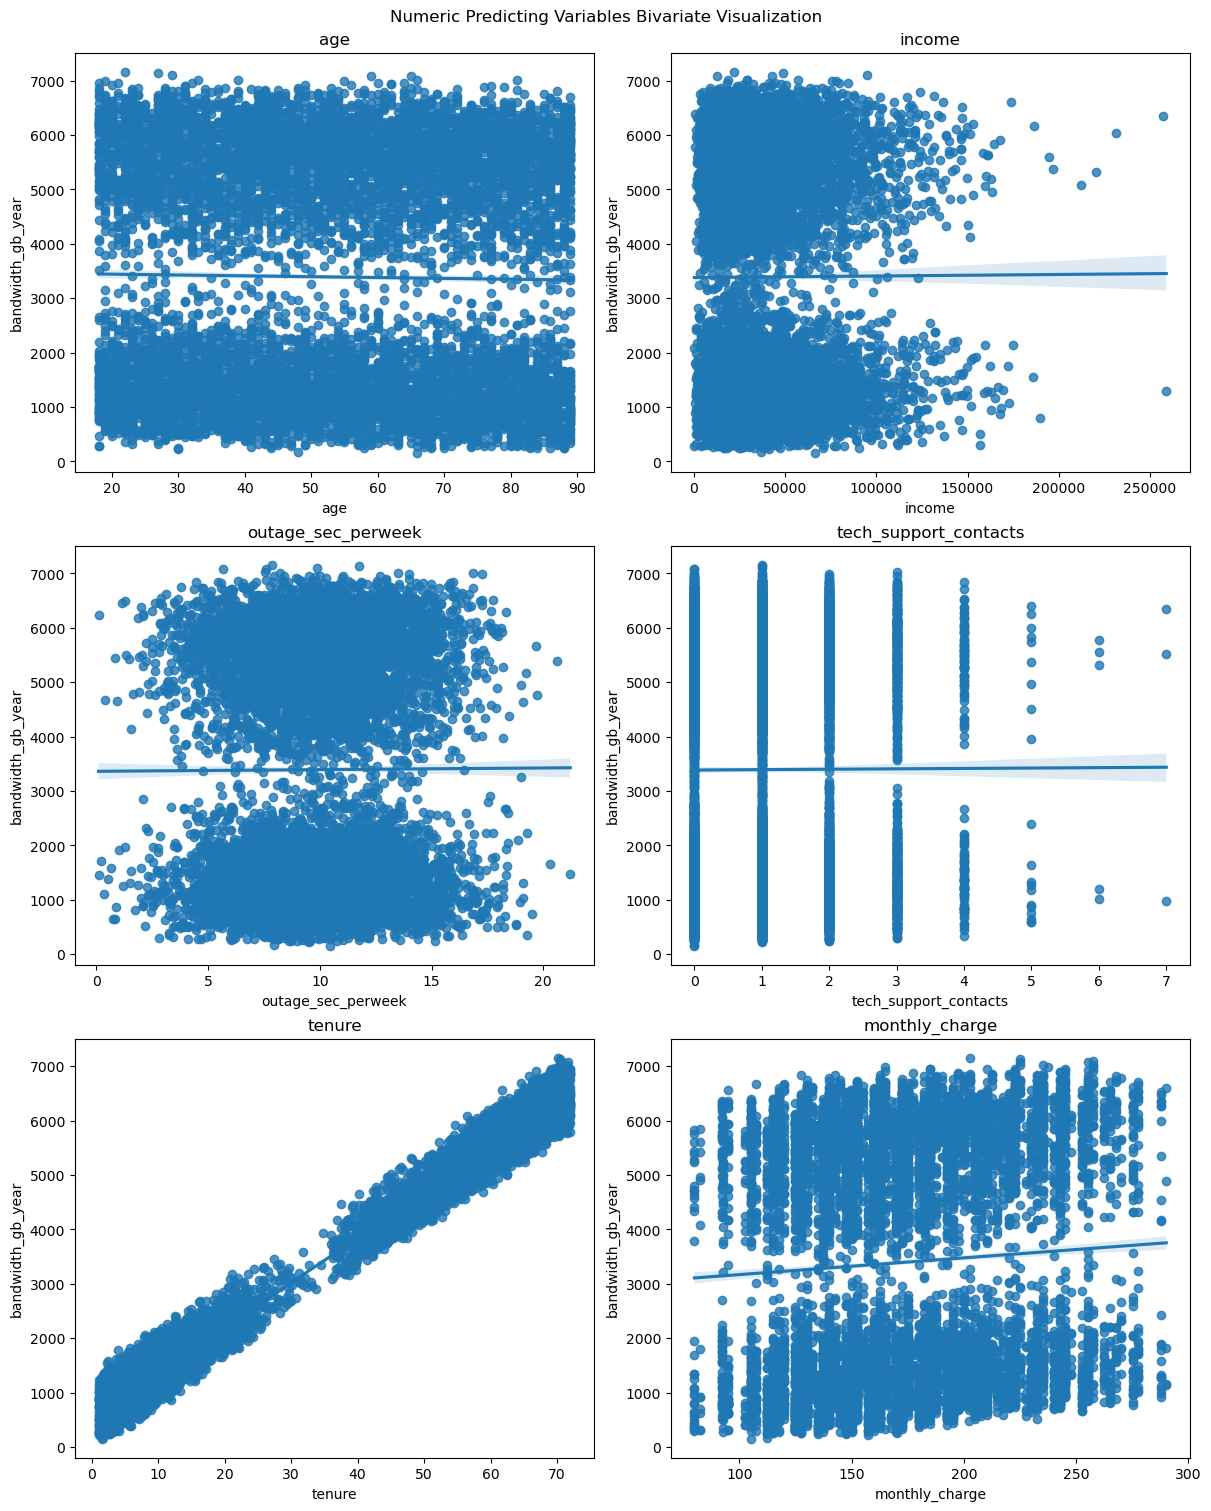

In [17]:
#Creating scatterplot visualizations for the relationship between my dependent variable and numeric independent variables
fig, axes = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(12, 15), constrained_layout=True)

for col, ax in zip(ind_num.columns, axes.flat):
    plt.suptitle('Numeric Predicting Variables Bivariate Visualization')
    sns.regplot(x=ind_num[col], y=df['bandwidth_gb_year'], ax=ax)
    ax.set_title(col)

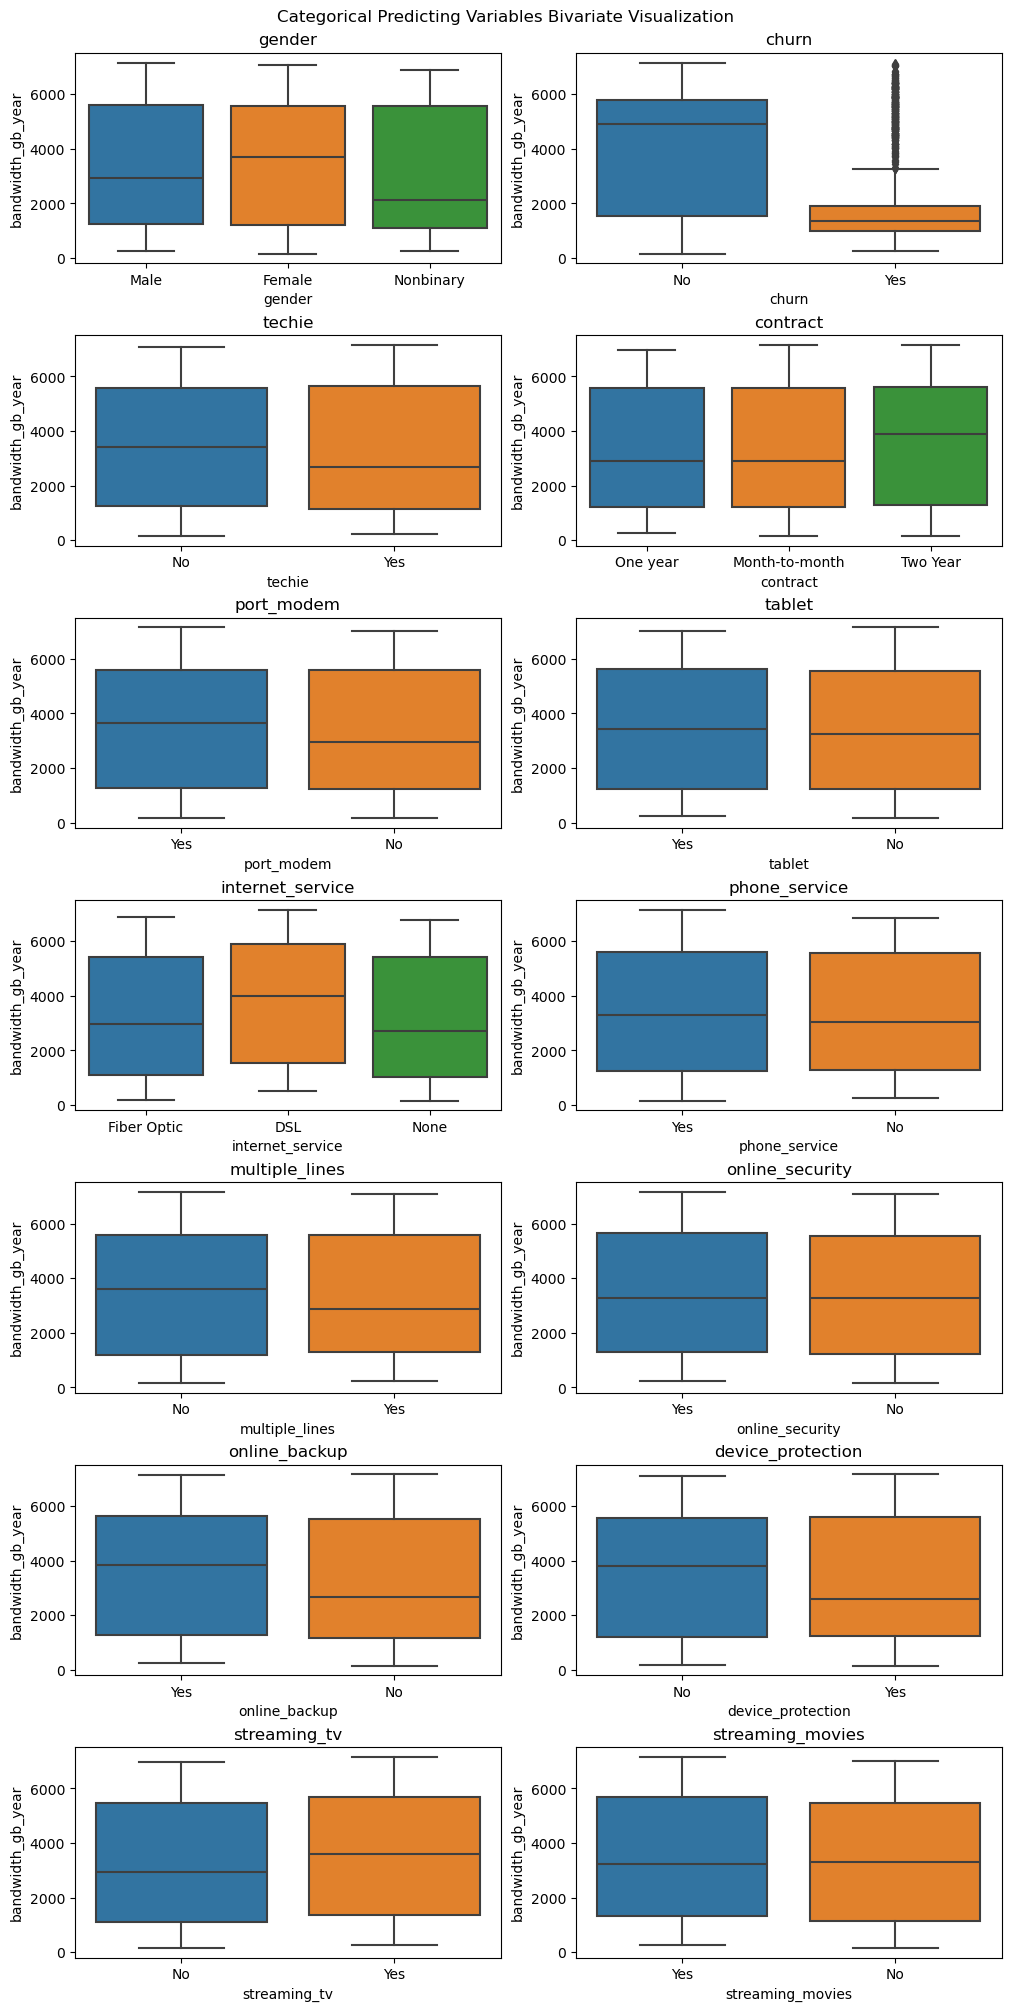

In [18]:
#Creating boxplot visualizations for the relationship between my dependent variable and categorical independent variables
fig, axes = plt.subplots(7, 2, sharex=False, sharey=False, figsize=(10, 20), constrained_layout=True)

for col, ax in zip(ind_cat.columns, axes.flat):
    plt.suptitle('Categorical Predicting Variables Bivariate Visualization')
    sns.boxplot(x=ind_cat[col], y=df['bandwidth_gb_year'], ax=ax)
    ax.set_title(col)

## C4: Data Transformation

In [19]:
#Re-expressing my categorical data
#Checking for booleans in my categorical variables
ind_cat

,gender,churn,techie,contract,port_modem,tablet,internet_service,phone_service,multiple_lines,online_security,online_backup,device_protection,streaming_tv,streaming_movies
0,Male,No,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,Yes
1,Female,Yes,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes
2,Female,No,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,Male,No,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,Yes,No
4,Male,Yes,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,No,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No
9996,Male,No,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,No
9997,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No
9998,Male,No,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes


In [20]:
#Transforming binary categorical variables to express numeric values
binary_cat = ['churn', 'techie', 'port_modem', 'tablet', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies']
df[binary_cat] = df[binary_cat].replace({'No': 0, 'Yes': 1})

In [21]:
#Transforming other categorical variables 
df = pd.get_dummies(df, columns=['gender', 'contract', 'internet_service'], drop_first=True)

df

,age,income,churn,outage_sec_perweek,tech_support_contacts,techie,port_modem,tablet,phone_service,multiple_lines,online_security,online_backup,device_protection,streaming_tv,streaming_movies,tenure,monthly_charge,bandwidth_gb_year,gender_Male,gender_Nonbinary,contract_One year,contract_Two Year,internet_service_Fiber Optic,internet_service_None
0,68,28561.99,0,7.978323,0,0,1,1,1,0,1,1,0,0,1,6.795513,172.455519,904.536110,True,False,True,False,True,False
1,27,21704.77,1,11.699080,0,1,0,1,1,1,1,0,0,1,1,1.156681,242.632554,800.982766,False,False,False,False,True,False
2,50,9609.57,0,10.752800,0,1,1,0,1,1,0,0,0,0,1,15.754144,159.947583,2054.706961,False,False,False,True,False,False
3,48,18925.23,0,14.913540,2,1,0,0,1,0,1,0,0,1,0,17.087227,119.956840,2164.579412,True,False,False,True,False,False
4,83,40074.19,1,8.147417,2,0,1,0,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,55723.74,0,9.415935,2,0,1,1,1,1,0,1,1,0,0,68.197130,159.979400,6511.252601,True,False,False,False,False,False
9996,48,34129.34,0,6.740547,2,0,0,0,1,1,1,1,1,1,0,61.040370,207.481100,5695.951810,True,False,False,True,True,False
9997,48,45983.43,0,6.590911,0,0,0,0,1,1,1,1,0,0,0,47.416890,169.974100,4159.305799,False,False,False,False,True,False
9998,39,16667.58,0,12.071910,1,0,0,1,0,1,0,0,0,1,1,71.095600,252.624000,6468.456752,True,False,False,True,True,False


In [22]:
# converting dummy booleans into numeric values
dummies = ['gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']
df[dummies] = df[dummies].astype('int64')

df

,age,income,churn,outage_sec_perweek,tech_support_contacts,techie,port_modem,tablet,phone_service,multiple_lines,online_security,online_backup,device_protection,streaming_tv,streaming_movies,tenure,monthly_charge,bandwidth_gb_year,gender_Male,gender_Nonbinary,contract_One year,contract_Two Year,internet_service_Fiber Optic,internet_service_None
0,68,28561.99,0,7.978323,0,0,1,1,1,0,1,1,0,0,1,6.795513,172.455519,904.536110,1,0,1,0,1,0
1,27,21704.77,1,11.699080,0,1,0,1,1,1,1,0,0,1,1,1.156681,242.632554,800.982766,0,0,0,0,1,0
2,50,9609.57,0,10.752800,0,1,1,0,1,1,0,0,0,0,1,15.754144,159.947583,2054.706961,0,0,0,1,0,0
3,48,18925.23,0,14.913540,2,1,0,0,1,0,1,0,0,1,0,17.087227,119.956840,2164.579412,1,0,0,1,0,0
4,83,40074.19,1,8.147417,2,0,1,0,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,55723.74,0,9.415935,2,0,1,1,1,1,0,1,1,0,0,68.197130,159.979400,6511.252601,1,0,0,0,0,0
9996,48,34129.34,0,6.740547,2,0,0,0,1,1,1,1,1,1,0,61.040370,207.481100,5695.951810,1,0,0,1,1,0
9997,48,45983.43,0,6.590911,0,0,0,0,1,1,1,1,0,0,0,47.416890,169.974100,4159.305799,0,0,0,0,1,0
9998,39,16667.58,0,12.071910,1,0,0,1,0,1,0,0,0,1,1,71.095600,252.624000,6468.456752,1,0,0,1,1,0


## C5: Data CSV File

In [23]:
#Saving the cleaned data in a CSV file
df.to_csv('clean_churn_data.csv', index=False)

## D1: Initial Linear Regression Model

In [24]:
#Constructing an initial multiple linear regression model

#Setting my dependent variable
y = df.bandwidth_gb_year

#Setting my independent variables
X = df[['age', 'income', 'churn', 'outage_sec_perweek', 'tech_support_contacts', 'techie', 'port_modem', 'tablet', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.511e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:53:39   Log-Likelihood:                -56344.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9976   BIC:                         1.129e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3759      0.033   -102.937      0.000      -3.440      -3.312
income                        2.217e-05   2.41e-05      0.921      0.357    -2.5e-05    6.93e-05
churn                            2.8872      2.147      1.345      0.179      -1.321       7.096
outage_sec_perweek               0.0493      0.228      0.216      0.829      -0.398       0.496
tech_support_contacts           -1.2331      0.687     -1.796      0.073      -2.579       0.113
techie                          -1.3065      1.822     -0.717      0.473      -4.878       2.265
port_modem                       0.9626      1.358      0.709      0.478      -1.699       3.624
tablet                           0.1329      1.483      0.090      0.929      -2.774       3.040
phone_service                   -0.6214      2.335     -0.266      0.790      -5.198       3.955
multiple_lines                   1.1608      2.471      0.470      0.639      -3.683       6.005
online_security                 70.9132      1.428     49.648      0.000      68.113      73.713
online_backup                   47.2486      1.978     23.889      0.000      43.372      51.126
device_protection               59.7532      1.582     37.779      0.000      56.653      62.854
streaming_tv                   138.8625      3.004     46.226      0.000     132.974     144.751
streaming_movies               101.4804      3.583     28.320      0.000      94.456     108.505
tenure                          81.9448      0.031   2648.879      0.000      81.884      82.005
monthly_charge                   2.0773      0.064     32.463      0.000       1.952       2.203
gender_Male                     65.6324      1.375     47.735      0.000      62.937      68.328
gender_Nonbinary               -21.3311      4.567     -4.670      0.000     -30.284     -12.378
contract_One year                3.8246      1.814      2.108      0.035       0.268       7.381
contract_Two Year                4.3457      1.730      2.513      0.012       0.955       7.736
internet_service_Fiber Optic  -454.4823      2.006   -226.614      0.000    -458.414    -450.551
internet_service_None         -385.7334      2.046   -188.535      0.000    -389.744    -381.723
const                          441.5382      7.221     61.150      0.000     427.385     455.692
==============================================================================
Omnibus:                     2194.575   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4381.934
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.888   Cond. No.                     6.08e+05
=====================================================================

## D2: Model Reduction Justification


In [25]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing tablet
y = df.bandwidth_gb_year
X = df[['age', 'income', 'churn', 'outage_sec_perweek', 'tech_support_contacts', 'techie', 'port_modem', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.717e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:54:47   Log-Likelihood:                -56344.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9977   BIC:                         1.129e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3759      0.033   -102.943      0.000      -3.440      -3.312
income                        2.218e-05   2.41e-05      0.922      0.357    -2.5e-05    6.94e-05
churn                            2.8857      2.147      1.344      0.179      -1.322       7.094
outage_sec_perweek               0.0494      0.228      0.217      0.829      -0.398       0.497
tech_support_contacts           -1.2338      0.687     -1.797      0.072      -2.580       0.112
techie                          -1.3045      1.822     -0.716      0.474      -4.876       2.267
port_modem                       0.9627      1.358      0.709      0.478      -1.699       3.624
phone_service                   -0.6162      2.334     -0.264      0.792      -5.191       3.959
multiple_lines                   1.1609      2.471      0.470      0.639      -3.683       6.005
online_security                 70.9145      1.428     49.654      0.000      68.115      73.714
online_backup                   47.2500      1.978     23.891      0.000      43.373      51.127
device_protection               59.7534      1.582     37.781      0.000      56.653      62.854
streaming_tv                   138.8682      3.003     46.240      0.000     132.981     144.755
streaming_movies               101.4873      3.582     28.329      0.000      94.465     108.509
tenure                          81.9448      0.031   2649.032      0.000      81.884      82.005
monthly_charge                   2.0773      0.064     32.466      0.000       1.952       2.203
gender_Male                     65.6313      1.375     47.738      0.000      62.936      68.326
gender_Nonbinary               -21.3312      4.567     -4.671      0.000     -30.283     -12.379
contract_One year                3.8270      1.814      2.110      0.035       0.271       7.383
contract_Two Year                4.3457      1.730      2.513      0.012       0.955       7.736
internet_service_Fiber Optic  -454.4814      2.005   -226.627      0.000    -458.412    -450.550
internet_service_None         -385.7340      2.046   -188.546      0.000    -389.744    -381.724
const                          441.5785      7.206     61.278      0.000     427.453     455.704
==============================================================================
Omnibus:                     2194.541   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4381.860
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.888   Cond. No.                     6.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

In [26]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing outage_sec_perweek
y = df.bandwidth_gb_year
X = df[['age', 'churn', 'tech_support_contacts', 'techie', 'port_modem', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.189e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:54:56   Log-Likelihood:                -56344.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9979   BIC:                         1.129e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3761      0.033   -102.959      0.000      -3.440      -3.312
churn                            2.8965      2.147      1.349      0.177      -1.311       7.104
tech_support_contacts           -1.2306      0.686     -1.793      0.073      -2.576       0.115
techie                          -1.3006      1.822     -0.714      0.475      -4.872       2.271
port_modem                       0.9465      1.357      0.697      0.486      -1.714       3.607
phone_service                   -0.6231      2.334     -0.267      0.789      -5.198       3.952
multiple_lines                   1.1426      2.470      0.463      0.644      -3.700       5.985
online_security                 70.8989      1.428     49.649      0.000      68.100      73.698
online_backup                   47.2274      1.977     23.884      0.000      43.351      51.103
device_protection               59.7705      1.581     37.805      0.000      56.671      62.870
streaming_tv                   138.8382      3.002     46.241      0.000     132.953     144.724
streaming_movies               101.4547      3.581     28.328      0.000      94.435     108.475
tenure                          81.9450      0.031   2649.232      0.000      81.884      82.006
monthly_charge                   2.0779      0.064     32.482      0.000       1.952       2.203
gender_Male                     65.6051      1.374     47.737      0.000      62.911      68.299
gender_Nonbinary               -21.3173      4.567     -4.668      0.000     -30.269     -12.366
contract_One year                3.8298      1.814      2.111      0.035       0.274       7.385
contract_Two Year                4.3485      1.729      2.515      0.012       0.959       7.738
internet_service_Fiber Optic  -454.5179      2.005   -226.733      0.000    -458.447    -450.588
internet_service_None         -385.7384      2.046   -188.564      0.000    -389.748    -381.728
const                          442.9352      6.761     65.511      0.000     429.682     456.189
==============================================================================
Omnibus:                     2194.932   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4383.426
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing phone_service
y = df.bandwidth_gb_year
X = df[['age', 'churn', 'tech_support_contacts', 'techie', 'port_modem', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.463e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:00   Log-Likelihood:                -56344.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9980   BIC:                         1.129e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3762      0.033   -102.973      0.000      -3.440      -3.312
churn                            2.9089      2.146      1.356      0.175      -1.298       7.115
tech_support_contacts           -1.2317      0.686     -1.794      0.073      -2.577       0.114
techie                          -1.3006      1.822     -0.714      0.475      -4.872       2.270
port_modem                       0.9457      1.357      0.697      0.486      -1.715       3.606
multiple_lines                   1.1316      2.470      0.458      0.647      -3.710       5.973
online_security                 70.8977      1.428     49.651      0.000      68.099      73.697
online_backup                   47.2221      1.977     23.884      0.000      43.347      51.098
device_protection               59.7781      1.581     37.818      0.000      56.680      62.877
streaming_tv                   138.8296      3.002     46.243      0.000     132.945     144.714
streaming_movies               101.4392      3.581     28.329      0.000      94.420     108.458
tenure                          81.9450      0.031   2649.493      0.000      81.884      82.006
monthly_charge                   2.0781      0.064     32.491      0.000       1.953       2.204
gender_Male                     65.6039      1.374     47.738      0.000      62.910      68.298
gender_Nonbinary               -21.3215      4.566     -4.669      0.000     -30.273     -12.370
contract_One year                3.8260      1.814      2.109      0.035       0.271       7.381
contract_Two Year                4.3491      1.729      2.515      0.012       0.959       7.739
internet_service_Fiber Optic  -454.5202      2.005   -226.747      0.000    -458.449    -450.591
internet_service_None         -385.7375      2.046   -188.572      0.000    -389.747    -381.728
const                          442.3451      6.390     69.229      0.000     429.820     454.870
==============================================================================
Omnibus:                     2194.999   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4383.783
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing multiple_lines
y = df.bandwidth_gb_year
X = df[['age', 'churn', 'tech_support_contacts', 'techie', 'port_modem', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.766e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:01   Log-Likelihood:                -56345.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9981   BIC:                         1.129e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3764      0.033   -102.997      0.000      -3.441      -3.312
churn                            2.9054      2.146      1.354      0.176      -1.301       7.112
tech_support_contacts           -1.2316      0.686     -1.794      0.073      -2.577       0.114
techie                          -1.3162      1.821     -0.723      0.470      -4.887       2.254
port_modem                       0.9481      1.357      0.699      0.485      -1.712       3.609
online_security                 70.8278      1.420     49.890      0.000      68.045      73.611
online_backup                   46.6745      1.575     29.636      0.000      43.587      49.762
device_protection               59.4767      1.437     41.382      0.000      56.659      62.294
streaming_tv                   137.8079      2.010     68.560      0.000     133.868     141.748
streaming_movies               100.1753      2.283     43.882      0.000      95.700     104.650
tenure                          81.9450      0.031   2649.619      0.000      81.884      82.006
monthly_charge                   2.1024      0.036     58.711      0.000       2.032       2.173
gender_Male                     65.6129      1.374     47.752      0.000      62.919      68.306
gender_Nonbinary               -21.3068      4.566     -4.666      0.000     -30.257     -12.356
contract_One year                3.8292      1.814      2.111      0.035       0.274       7.384
contract_Two Year                4.3518      1.729      2.517      0.012       0.962       7.741
internet_service_Fiber Optic  -454.9936      1.718   -264.902      0.000    -458.360    -451.627
internet_service_None         -385.4317      1.934   -199.341      0.000    -389.222    -381.642
const                          440.3554      4.687     93.960      0.000     431.169     449.542
==============================================================================
Omnibus:                     2193.280   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4377.822
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.887   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing port_modem
y = df.bandwidth_gb_year
X = df[['age', 'churn', 'tech_support_contacts', 'techie', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.106e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:07   Log-Likelihood:                -56345.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9982   BIC:                         1.129e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3763      0.033   -102.998      0.000      -3.441      -3.312
churn                            2.9281      2.146      1.365      0.172      -1.278       7.134
tech_support_contacts           -1.2329      0.686     -1.796      0.072      -2.578       0.113
techie                          -1.3352      1.821     -0.733      0.463      -4.905       2.235
online_security                 70.8313      1.420     49.894      0.000      68.049      73.614
online_backup                   46.6763      1.575     29.638      0.000      43.589      49.763
device_protection               59.4750      1.437     41.382      0.000      56.658      62.292
streaming_tv                   137.8125      2.010     68.565      0.000     133.873     141.752
streaming_movies               100.1865      2.283     43.889      0.000      95.712     104.661
tenure                          81.9453      0.031   2650.018      0.000      81.885      82.006
monthly_charge                   2.1022      0.036     58.709      0.000       2.032       2.172
gender_Male                     65.6257      1.374     47.766      0.000      62.933      68.319
gender_Nonbinary               -21.3024      4.566     -4.665      0.000     -30.253     -12.352
contract_One year                3.8206      1.814      2.107      0.035       0.266       7.376
contract_Two Year                4.3547      1.729      2.518      0.012       0.965       7.744
internet_service_Fiber Optic  -454.9831      1.717   -264.912      0.000    -458.350    -451.617
internet_service_None         -385.4302      1.933   -199.345      0.000    -389.220    -381.640
const                          440.8134      4.640     94.994      0.000     431.717     449.910
==============================================================================
Omnibus:                     2194.217   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4380.850
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.888   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing techie
y = df.bandwidth_gb_year
X = df[['age', 'churn', 'tech_support_contacts', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.488e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:10   Log-Likelihood:                -56345.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9983   BIC:                         1.128e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3761      0.033   -102.998      0.000      -3.440      -3.312
churn                            2.7977      2.138      1.309      0.191      -1.393       6.989
tech_support_contacts           -1.2352      0.686     -1.800      0.072      -2.581       0.110
online_security                 70.8452      1.419     49.909      0.000      68.063      73.628
online_backup                   46.6718      1.575     29.636      0.000      43.585      49.759
device_protection               59.4540      1.437     41.377      0.000      56.637      62.271
streaming_tv                   137.8240      2.010     68.574      0.000     133.884     141.764
streaming_movies               100.2087      2.282     43.903      0.000      95.735     104.683
tenure                          81.9445      0.031   2651.997      0.000      81.884      82.005
monthly_charge                   2.1025      0.036     58.722      0.000       2.032       2.173
gender_Male                     65.6393      1.374     47.782      0.000      62.947      68.332
gender_Nonbinary               -21.2641      4.566     -4.657      0.000     -30.214     -12.315
contract_One year                3.7857      1.813      2.088      0.037       0.232       7.339
contract_Two Year                4.3291      1.729      2.504      0.012       0.940       7.718
internet_service_Fiber Optic  -454.9999      1.717   -264.952      0.000    -458.366    -451.634
internet_service_None         -385.4310      1.933   -199.350      0.000    -389.221    -381.641
const                          440.5975      4.631     95.141      0.000     431.520     449.675
==============================================================================
Omnibus:                     2194.280   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4380.643
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.888   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing churn
y = df.bandwidth_gb_year
X = df[['age', 'tech_support_contacts', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.920e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:14   Log-Likelihood:                -56346.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9984   BIC:                         1.128e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3757      0.033   -102.986      0.000      -3.440      -3.311
tech_support_contacts           -1.2236      0.686     -1.783      0.075      -2.569       0.122
online_security                 70.7836      1.419     49.891      0.000      68.003      73.565
online_backup                   46.5975      1.574     29.607      0.000      43.512      49.683
device_protection               59.4201      1.437     41.359      0.000      56.604      62.236
streaming_tv                   137.9924      2.006     68.797      0.000     134.061     141.924
streaming_movies               100.3946      2.278     44.069      0.000      95.929     104.860
tenure                          81.9219      0.026   3191.212      0.000      81.872      81.972
monthly_charge                   2.1125      0.035     60.397      0.000       2.044       2.181
gender_Male                     65.6800      1.373     47.822      0.000      62.988      68.372
gender_Nonbinary               -21.3114      4.566     -4.668      0.000     -30.261     -12.362
contract_One year                3.1262      1.742      1.795      0.073      -0.288       6.540
contract_Two Year                3.6612      1.652      2.217      0.027       0.424       6.899
internet_service_Fiber Optic  -455.4496      1.683   -270.680      0.000    -458.748    -452.151
internet_service_None         -385.5612      1.931   -199.675      0.000    -389.346    -381.776
const                          440.7602      4.629     95.207      0.000     431.686     449.835
==============================================================================
Omnibus:                     2192.690   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4374.979
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.886   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing tech_support_contacts
y = df.bandwidth_gb_year
X = df[['age', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_One year', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.413e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:16   Log-Likelihood:                -56348.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9985   BIC:                         1.128e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3766      0.033   -103.014      0.000      -3.441      -3.312
online_security                 70.7539      1.419     49.868      0.000      67.973      73.535
online_backup                   46.5451      1.574     29.575      0.000      43.460      49.630
device_protection               59.4045      1.437     41.344      0.000      56.588      62.221
streaming_tv                   137.9386      2.006     68.770      0.000     134.007     141.870
streaming_movies               100.3040      2.278     44.035      0.000      95.839     104.769
tenure                          81.9219      0.026   3190.866      0.000      81.872      81.972
monthly_charge                   2.1138      0.035     60.437      0.000       2.045       2.182
gender_Male                     65.6770      1.374     47.815      0.000      62.985      68.370
gender_Nonbinary               -21.3214      4.566     -4.669      0.000     -30.272     -12.371
contract_One year                3.1255      1.742      1.794      0.073      -0.289       6.540
contract_Two Year                3.6390      1.652      2.203      0.028       0.401       6.877
internet_service_Fiber Optic  -455.4620      1.683   -270.660      0.000    -458.761    -452.163
internet_service_None         -385.4897      1.931   -199.659      0.000    -389.274    -381.705
const                          439.4901      4.575     96.067      0.000     430.522     448.458
==============================================================================
Omnibus:                     2192.983   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4374.431
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                       4.885   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing contract_One year
y = df.bandwidth_gb_year
X = df[['age', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'contract_Two Year', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.981e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:20   Log-Likelihood:                -56349.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9986   BIC:                         1.128e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3771      0.033   -103.020      0.000      -3.441      -3.313
online_security                 70.7639      1.419     49.870      0.000      67.982      73.545
online_backup                   46.5101      1.574     29.552      0.000      43.425      49.595
device_protection               59.4046      1.437     41.339      0.000      56.588      62.221
streaming_tv                   137.9440      2.006     68.765      0.000     134.012     141.876
streaming_movies               100.2300      2.278     44.005      0.000      95.765     104.695
tenure                          81.9219      0.026   3190.511      0.000      81.872      81.972
monthly_charge                   2.1150      0.035     60.477      0.000       2.046       2.184
gender_Male                     65.6573      1.374     47.797      0.000      62.965      68.350
gender_Nonbinary               -21.3034      4.567     -4.665      0.000     -30.255     -12.352
contract_Two Year                2.7695      1.579      1.754      0.080      -0.326       5.865
internet_service_Fiber Optic  -455.5108      1.683   -270.694      0.000    -458.809    -452.212
internet_service_None         -385.4534      1.931   -199.629      0.000    -389.238    -381.669
const                          440.2387      4.556     96.623      0.000     431.308     449.170
==============================================================================
Omnibus:                     2197.461   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4389.728
Skew:                           1.320   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Backward Elimination: Removing statistically insignificant (p-value > 0.05) independent variables
# Removing contract_Two Year
y = df.bandwidth_gb_year
X = df[['age', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

#Fitting the model
regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.644e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:55:25   Log-Likelihood:                -56351.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9987   BIC:                         1.128e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3775      0.033   -103.025      0.000      -3.442      -3.313
online_security                 70.8045      1.419     49.900      0.000      68.023      73.586
online_backup                   46.4866      1.574     29.535      0.000      43.401      49.572
device_protection               59.3852      1.437     41.323      0.000      56.568      62.202
streaming_tv                   137.9252      2.006     68.750      0.000     133.993     141.858
streaming_movies               100.1848      2.278     43.983      0.000      95.720     104.650
tenure                          81.9227      0.026   3190.831      0.000      81.872      81.973
monthly_charge                   2.1155      0.035     60.489      0.000       2.047       2.184
gender_Male                     65.6917      1.374     47.822      0.000      62.999      68.384
gender_Nonbinary               -21.3025      4.567     -4.664      0.000     -30.255     -12.350
internet_service_Fiber Optic  -455.5149      1.683   -270.669      0.000    -458.814    -452.216
internet_service_None         -385.4753      1.931   -199.624      0.000    -389.260    -381.690
const                          440.8402      4.544     97.020      0.000     431.933     449.747
==============================================================================
Omnibus:                     2197.368   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4389.575
Skew:                           1.320   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#Addressing multicollinearity with variance inflation factor (VIF)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

#Displaying the values and finding features with a high VIF
print("VIF values for selected features:")
print(vif)

high_vif = vif[vif["VIF"] > 5]
print("Features with high Multicollinearity:")
print(high_vif)

VIF values for selected features:
                         Feature        VIF
0                            age   1.001165
1                online_security   1.005706
2                  online_backup   1.333562
3              device_protection   1.105783
4                   streaming_tv   2.187528
5               streaming_movies   2.819099
6                         tenure   1.002156
7                 monthly_charge   4.904362
8                    gender_Male   1.023122
9               gender_Nonbinary   1.023528
10  internet_service_Fiber Optic   1.518070
11         internet_service_None   1.358710
12                         const  44.894664
Features with high Multicollinearity:
   Feature        VIF
12   const  44.894664


## D3: Reduced Linear Regression Model


In [37]:
#Printing my reduced model
y = df.bandwidth_gb_year
X = df[['age', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'tenure', 'monthly_charge', 'gender_Male', 'gender_Nonbinary', 'internet_service_Fiber Optic', 'internet_service_None']].assign(const=1)

regres_model = sm.OLS(y,X)
regres_model_results = regres_model.fit()

regres_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      bandwidth_gb_year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.644e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:57:48   Log-Likelihood:                -56351.
No. Observations:               10000   AIC:                         1.127e+05
Df Residuals:                    9987   BIC:                         1.128e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                             -3.3775      0.033   -103.025      0.000      -3.442      -3.313
online_security                 70.8045      1.419     49.900      0.000      68.023      73.586
online_backup                   46.4866      1.574     29.535      0.000      43.401      49.572
device_protection               59.3852      1.437     41.323      0.000      56.568      62.202
streaming_tv                   137.9252      2.006     68.750      0.000     133.993     141.858
streaming_movies               100.1848      2.278     43.983      0.000      95.720     104.650
tenure                          81.9227      0.026   3190.831      0.000      81.872      81.973
monthly_charge                   2.1155      0.035     60.489      0.000       2.047       2.184
gender_Male                     65.6917      1.374     47.822      0.000      62.999      68.384
gender_Nonbinary               -21.3025      4.567     -4.664      0.000     -30.255     -12.350
internet_service_Fiber Optic  -455.5149      1.683   -270.669      0.000    -458.814    -452.216
internet_service_None         -385.4753      1.931   -199.624      0.000    -389.260    -381.690
const                          440.8402      4.544     97.020      0.000     431.933     449.747
==============================================================================
Omnibus:                     2197.368   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4389.575
Skew:                           1.320   Prob(JB):                         0.00
Kurtosis:                       4.889   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## E2: Analysis Output & Calculations

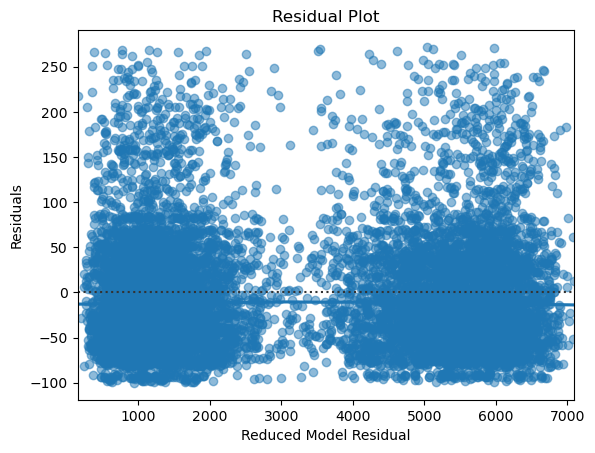

In [38]:
# Creating a residual plot for the reduced model
ax = sns.residplot(x=regres_model_results.fittedvalues, y=regres_model_results.resid, lowess=True, scatter_kws={'alpha': 0.5})
ax.set(xlabel='Reduced Model Residual', ylabel='Residuals')
plt.title('Residual Plot')
plt.show()

In [39]:
#Checking the residual standard error of the reduced model
residuals = regres_model_results.resid
mse = np.mean(residuals**2)
reduced_rse = np.sqrt(mse)

print("Residual Std Err")
print('reduced model:', reduced_rse)

Residual Std Err
reduced model: 67.77048826737139
